<a href="https://colab.research.google.com/github/DiabeticRetinopathy114/114_DR/blob/main/64x3_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow import lite
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import pandas as pd
import random, os
import shutil
import matplotlib.pyplot as plt
from matplotlib.image import imread

from tensorflow.keras.metrics import categorical_accuracy
from sklearn.model_selection import train_test_split

In [ ]:
from google.colab import files #匯入套件
import pandas as pd
upload = files.upload() #開啟上傳介面並載入
df = pd.read_csv("train.csv")

Saving train.csv to train.csv


In [ ]:
diagnosis_dict_binary = {
    0: 'NoDR',
    1: 'NPDR',
    2: 'NPDR',
    3: 'NPDR',
    4: 'DR'
}

diagnosis_dict = {
    0: 'NoDR',
    1: 'Mild',
    2: 'Moderate',
    3: 'Severe',
    4: 'Proliferate_DR',
}


df['binary_type'] =  df['diagnosis'].map(diagnosis_dict_binary.get)
df['type'] = df['diagnosis'].map(diagnosis_dict.get)
df.head()

,id_code,diagnosis,binary_type,type
0,000c1434d8d7,2,NPDR,Moderate
1,001639a390f0,4,DR,Proliferate_DR
2,0024cdab0c1e,1,NPDR,Mild
3,002c21358ce6,0,NoDR,NoDR
4,005b95c28852,0,NoDR,NoDR


<Axes: ylabel='type'>

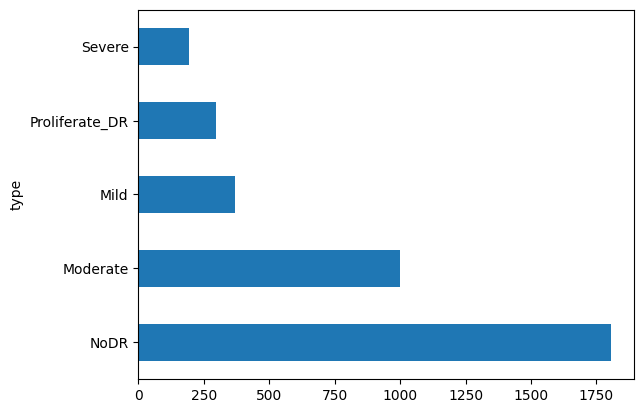

In [ ]:
df['type'].value_counts().plot(kind='barh')

<Axes: ylabel='binary_type'>

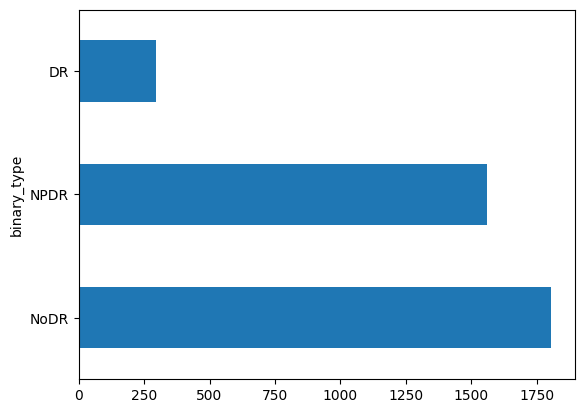

In [ ]:
df['binary_type'].value_counts().plot(kind='barh')

In [ ]:
# Split into stratified train, val, and test sets
train_intermediate, val = train_test_split(df, test_size = 0.15, stratify = df['type'])
train, test = train_test_split(train_intermediate, test_size = 0.15 / (1 - 0.15), stratify = train_intermediate['type'])

print(train['type'].value_counts(), '\n')
print(test['type'].value_counts(), '\n')
print(val['type'].value_counts(), '\n')

type
NoDR              1263
Moderate           699
Mild               258
Proliferate_DR     207
Severe             135
Name: count, dtype: int64 

type
NoDR              271
Moderate          150
Mild               56
Proliferate_DR     44
Severe             29
Name: count, dtype: int64 

type
NoDR              271
Moderate          150
Mild               56
Proliferate_DR     44
Severe             29
Name: count, dtype: int64 



In [ ]:
# Create working directories for train/val/test
base_dir = ''

train_dir = os.path.join(base_dir, 'train')
val_dir = os.path.join(base_dir, 'val')
test_dir = os.path.join(base_dir, 'test')

if os.path.exists(base_dir):
    shutil.rmtree(base_dir)

if os.path.exists(train_dir):
    shutil.rmtree(train_dir)
os.makedirs(train_dir)

if os.path.exists(val_dir):
    shutil.rmtree(val_dir)
os.makedirs(val_dir)

if os.path.exists(test_dir):
    shutil.rmtree(test_dir)
os.makedirs(test_dir)

In [ ]:
import os
import zipfile
from google.colab import files
import shutil
import glob
import matplotlib.pyplot as plt
import cv2  # 用於讀取圖片

In [ ]:
# 1️⃣ 上傳壓縮檔
uploaded = files.upload()  # 選擇並上傳 ZIP 檔案
zip_file_name = list(uploaded.keys())[0]  # 取得上傳的檔名


Saving 224x224_GaussianFiltered.zip to 224x224_GaussianFiltered.zip


In [ ]:
#解壓縮 ZIP 檔案
extract_dir = "/content/extracted_images"
os.makedirs(extract_dir, exist_ok=True)

with zipfile.ZipFile(zip_file_name, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)  # 解壓縮至指定目錄

print(f"檔案已解壓縮至: {extract_dir}")

檔案已解壓縮至: /content/extracted_images


In [ ]:
# #獲取所有圖片檔案
# image_extensions = ["*.png", "*.jpg", "*.jpeg"]  # 支援的圖片格式
# image_files = []
# for ext in image_extensions:
#     image_files.extend(glob.glob(os.path.join(extract_dir, "**", ext), recursive=True))

# print(f"找到 {len(image_files)} 張圖片")

In [ ]:
# #（可選）顯示部分圖片
# num_images_to_show = min(5, len(image_files))  # 最多顯示 5 張
# fig, axes = plt.subplots(1, num_images_to_show, figsize=(15, 5))

# for i in range(num_images_to_show):
#     img = cv2.imread(image_files[i])  # 讀取圖片
#     img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # 轉換顏色格式
#     axes[i].imshow(img)
#     axes[i].axis("off")
#     axes[i].set_title(os.path.basename(image_files[i]))

# plt.show()

In [ ]:
# Copy images to respective working directory
src_dir = "/content/extracted_images/224x224_GaussianFiltered/gaussian_filtered_images/gaussian_filtered_images"
for index, row in train.iterrows():
    diagnosis = row['type']
    binary_diagnosis = row['binary_type']
    id_code = row['id_code'] + ".png"
    srcfile = os.path.join(src_dir, diagnosis, id_code)
    dstfile = os.path.join(train_dir, binary_diagnosis, id_code) # add id_code here to create the full destination path including filename
    os.makedirs(os.path.dirname(dstfile), exist_ok = True) # Create directory if it doesn't exist

    if os.path.exists(srcfile): # Check if the source file exists
        shutil.copy(srcfile, dstfile)
    else:
        print(f"Warning: Source file not found: {srcfile}")

# Similar changes for val and test loops

for index, row in val.iterrows():
    diagnosis = row['type']
    binary_diagnosis = row['binary_type']
    id_code = row['id_code'] + ".png"
    srcfile = os.path.join(src_dir, diagnosis, id_code)
    dstfile = os.path.join(val_dir, binary_diagnosis, id_code) #add id_code here to create the full destination path including filename
    os.makedirs(os.path.dirname(dstfile), exist_ok = True) # Create directory if it doesn't exist
    if os.path.exists(srcfile): # Check if the source file exists
        shutil.copy(srcfile, dstfile)
    else:
        print(f"Warning: Source file not found: {srcfile}")


for index, row in test.iterrows():
    diagnosis = row['type']
    binary_diagnosis = row['binary_type']
    id_code = row['id_code'] + ".png"
    srcfile = os.path.join(src_dir, diagnosis, id_code)
    dstfile = os.path.join(test_dir, binary_diagnosis, id_code) #add id_code here to create the full destination path including filename
    os.makedirs(os.path.dirname(dstfile), exist_ok = True) # Create directory if it doesn't exist
    if os.path.exists(srcfile): # Check if the source file exists
        shutil.copy(srcfile, dstfile)
    else:
        print(f"Warning: Source file not found: {srcfile}")

In [ ]:
# Setting up ImageDataGenerator for train/val/test
from tensorflow.keras.preprocessing.image import ImageDataGenerator # Import from tensorflow.keras

train_path = 'train'
val_path = 'val'
test_path = 'test'

train_batches = ImageDataGenerator(rescale = 1./255).flow_from_directory(train_path, target_size=(224,224), shuffle = True)
val_batches = ImageDataGenerator(rescale = 1./255).flow_from_directory(val_path, target_size=(224,224), shuffle = True)
test_batches = ImageDataGenerator(rescale = 1./255).flow_from_directory(test_path, target_size=(224,224), shuffle = False)

Found 2562 images belonging to 3 classes.
Found 550 images belonging to 3 classes.
Found 550 images belonging to 3 classes.


In [ ]:
# Building the model

model = tf.keras.Sequential([
    layers.Conv2D(8, (3,3), padding="valid", input_shape=(224,224,3), activation = 'relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.BatchNormalization(),

    layers.Conv2D(16, (3,3), padding="valid", activation = 'relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.BatchNormalization(),

    layers.Conv2D(32, (4,4), padding="valid", activation = 'relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.BatchNormalization(),

    layers.Flatten(),
    layers.Dense(32, activation = 'relu'),
    layers.Dropout(0.15),
    layers.Dense(3, activation = 'softmax') # Changed the output to 3
])

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate = 1e-5), # Change 'lr' to 'learning_rate'
              loss=tf.keras.losses.CategoricalCrossentropy(), # Change loss function for multi-class classification
              metrics=['acc'])

history = model.fit(train_batches,
                    epochs=30,
                    validation_data=val_batches)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


81/81 ━━━━━━━━━━━━━━━━━━━━ 21s 167ms/step - acc: 0.6916 - loss: 0.7863 - val_acc: 0.4273 - val_loss: 1.0688
Epoch 2/30
81/81 ━━━━━━━━━━━━━━━━━━━━ 8s 99ms/step - acc: 0.8040 - loss: 0.5212 - val_acc: 0.4273 - val_loss: 1.1511
Epoch 3/30
81/81 ━━━━━━━━━━━━━━━━━━━━ 10s 101ms/step - acc: 0.8391 - loss: 0.4763 - val_acc: 0.4273 - val_loss: 1.1706
Epoch 4/30
81/81 ━━━━━━━━━━━━━━━━━━━━ 8s 99ms/step - acc: 0.8389 - loss: 0.4615 - val_acc: 0.4473 - val_loss: 1.0428
Epoch 5/30
81/81 ━━━━━━━━━━━━━━━━━━━━ 8s 102ms/step - acc: 0.8537 - loss: 0.4088 - val_acc: 0.6073 - val_loss: 0.7846
Epoch 6/30
81/81 ━━━━━━━━━━━━━━━━━━━━ 10s 101ms/step - acc: 0.8645 - loss: 0.3797 - val_acc: 0.7218 - val_loss: 0.6345
Epoch 7/30
81/81 ━━━━━━━━━━━━━━━━━━━━ 8s 104ms/step - acc: 0.8574 - loss: 0.3651 - val_acc: 0.8309 - val_loss: 0.4649
Epoch 8/30
81/81 ━━━━━━━━━━━━━━━━━━━━ 7s 91ms/step - acc: 0.8767 - loss: 0.3349 - val_acc: 0.8527 - val_loss: 0.4354
Epoch 9/30
81/81 ━━━━━━━━━━━━━━━━━━━━ 9s 106ms/step - acc: 0.8709 -

In [ ]:
model.save('64x3-CNN.keras') # Changed the extension to .keras

In [ ]:
# loss, acc = model.evaluate(train_batches, verbose=1)  # Replace evaluate_generator with evaluate
# # print("Loss: ", loss)
# print("Accuracy: ", acc)

loss, acc = model.evaluate(test_batches, verbose=1)  # Replace evaluate_generator with evaluate
# print("Loss: ", loss)
print("Accuracy: ", acc)

18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 71ms/step - acc: 0.7150 - loss: 0.8404
Accuracy:  0.8509091138839722


Diabet Retinopathy Detection Section

In [ ]:
import tensorflow as tf
import cv2
import numpy as np
import matplotlib.pyplot as plt


def predict_class(path):
    img = cv2.imread(path)

    RGBImg = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    RGBImg= cv2.resize(RGBImg,(224,224))
    plt.imshow(RGBImg)
    image = np.array(RGBImg) / 255.0
    new_model = tf.keras.models.load_model("64x3-CNN.keras")
    predict=new_model.predict(np.array([image]))
    per=np.argmax(predict,axis=1)
    if per==1:
        print('No DR')
    else:
        print('DR')

In [ ]:
predict_class('/content/extracted_images/gaussian_filtered_images/gaussian_filtered_images/Severe/03c85870824c.png')